In [28]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [29]:
df = pd.read_csv("Datasets/all_diseases.csv.gz")

In [30]:
df.head()

,country,date,year,month,transmission_mode,no_cases,no_deaths,cumulative_cases,cumulative_deaths,disease,week
0,Afghanistan,2020-01-22,2020,1,air,0.0,0.0,0.0,0.0,covid-19,4
1,Afghanistan,2020-01-23,2020,1,air,0.0,0.0,0.0,0.0,covid-19,4
2,Afghanistan,2020-01-24,2020,1,air,0.0,0.0,0.0,0.0,covid-19,4
3,Afghanistan,2020-01-25,2020,1,air,0.0,0.0,0.0,0.0,covid-19,4
4,Afghanistan,2020-01-26,2020,1,air,0.0,0.0,0.0,0.0,covid-19,4


In [55]:
x = df[['date', 'no_cases']].set_index('date')
x = x.dropna(how='all')
print(x)

            no_cases
date                
2020-01-22       0.0
2020-01-23       0.0
2020-01-24       0.0
2020-01-25       0.0
2020-01-26       0.0
...              ...
2000-12-31       0.0
2000-12-31       0.0
2000-12-31       0.0
2000-12-31       0.0
2000-12-31       0.0

[161513 rows x 1 columns]


In [32]:
df.country.value_counts()

China                   17766
Canada                   8727
United Kingdom           6264
France                   6264
Australia                4176
                        ...  
Turkmenistan               14
North Korea                11
Congo                      10
Côte d'Ivoire              10
Syrian Arab Republic       10
Name: country, Length: 221, dtype: int64

In [33]:
df[df.country.str.lower().str.contains('america')].country.value_counts()

United States of America    897
Name: country, dtype: int64

In [34]:
us_data = df[df.country.str.lower().str.contains('america')]

In [35]:
us_data.date = pd.to_datetime(us_data.date)


/Users/kmoreira/Library/Python/3.8/lib/python/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [36]:
us_data.date.dtype

dtype('<M8[ns]')

In [37]:
us_data.date.head()

132588   2020-01-22
132589   2020-01-23
132590   2020-01-24
132591   2020-01-25
132592   2020-01-26
Name: date, dtype: datetime64[ns]

In [38]:
cases_per_date = us_data.groupby(us_data.date.dt.to_period("M"))["no_cases"].sum().to_frame()

In [39]:
cases_per_date.index.to_timestamp()

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [40]:
cases_per_date.index = pd.to_datetime(cases_per_date.index.to_timestamp())

In [52]:
model_fit = ARIMA(cases_per_date, order=(1,1,1))
fit = model_fit.fit()

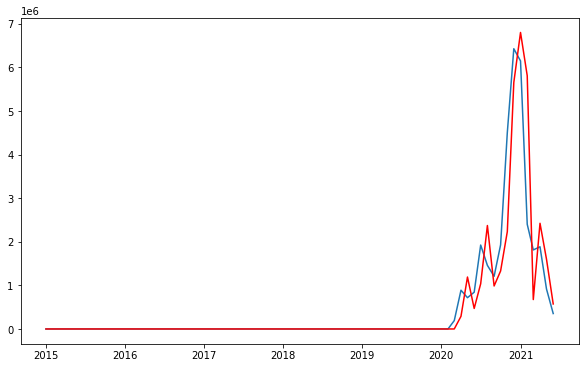

In [53]:
plt.plot(cases_per_date)
plt.plot(fit.fittedvalues, color='red')